In [1]:
# Exemplo 1 – Carregando o conjunto de dados. Nomeando
# colunas e mapeando valores não numéricos.
import pandas as pa
# Nomes que serão dados as colunas na mesma ordem em que
# aparecem
titanic_cols = [ 'ID', 'Sobrevivente', 'Classe', 'Nome','Sexo', 'Idade', 'EsposasEIrmãs', 'Parentes',
                'Passagem', 'Tarifa', 'Cabine', 'Embarque' ]
# Carrega o arquivo que contém o conjunto de dados
titanic_df_orig = pa.read_csv('Titanic_train.csv',names=titanic_cols, header=0)
# Transformação atributos previsores não numéricos e
# rotulação do alvo
titanic_df = titanic_df_orig.copy()
titanic_df['Sexo'] = titanic_df['Sexo'].map({'female':1, 'male': 0})
titanic_df['Embarque'] = titanic_df['Embarque'].map({'S':0, 'C': 1,'Q': 2})
pa.set_option('display.max_rows', 10)
titanic_df = titanic_df.copy()

In [2]:
titanic_df

,ID,Sobrevivente,Classe,Nome,Sexo,Idade,EsposasEIrmãs,Parentes,Passagem,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [4]:
# Exemplo 2 – Indexação de colunas com valores múltiplos
# valores não numéricos
def index_of_dic(dic, key):
 return dic[key]
def StrList_to_UniqueIndexList(lista):
 group = set(lista)

 dic = {}
 i = 0
 for g in group:
     if g not in dic:
         dic[g] = i
         i += 1
 return [index_of_dic(dic, p) for p in lista]
titanic_df['Passagem'] = StrList_to_UniqueIndexList(titanic_df['Passagem'])
titanic_df['Cabine'] = StrList_to_UniqueIndexList(titanic_df['Cabine'])
display(titanic_df_orig.head(5))
display(titanic_df.head(5))

,ID,Sobrevivente,Classe,Nome,Sexo,Idade,EsposasEIrmãs,Parentes,Passagem,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,ID,Sobrevivente,Classe,Nome,Sexo,Idade,EsposasEIrmãs,Parentes,Passagem,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,205,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,462,71.2833,104,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,107,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,63,53.1000,83,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,476,8.0500,0,0.0


In [5]:
titanic_df.describe()

,ID,Sobrevivente,Classe,Sexo,Idade,EsposasEIrmãs,Parentes,Passagem,Tarifa,Cabine,Embarque
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,343.367003,32.204208,17.345679,0.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,194.909138,49.693429,37.609967,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,179.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,347.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,509.500000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,2.000000


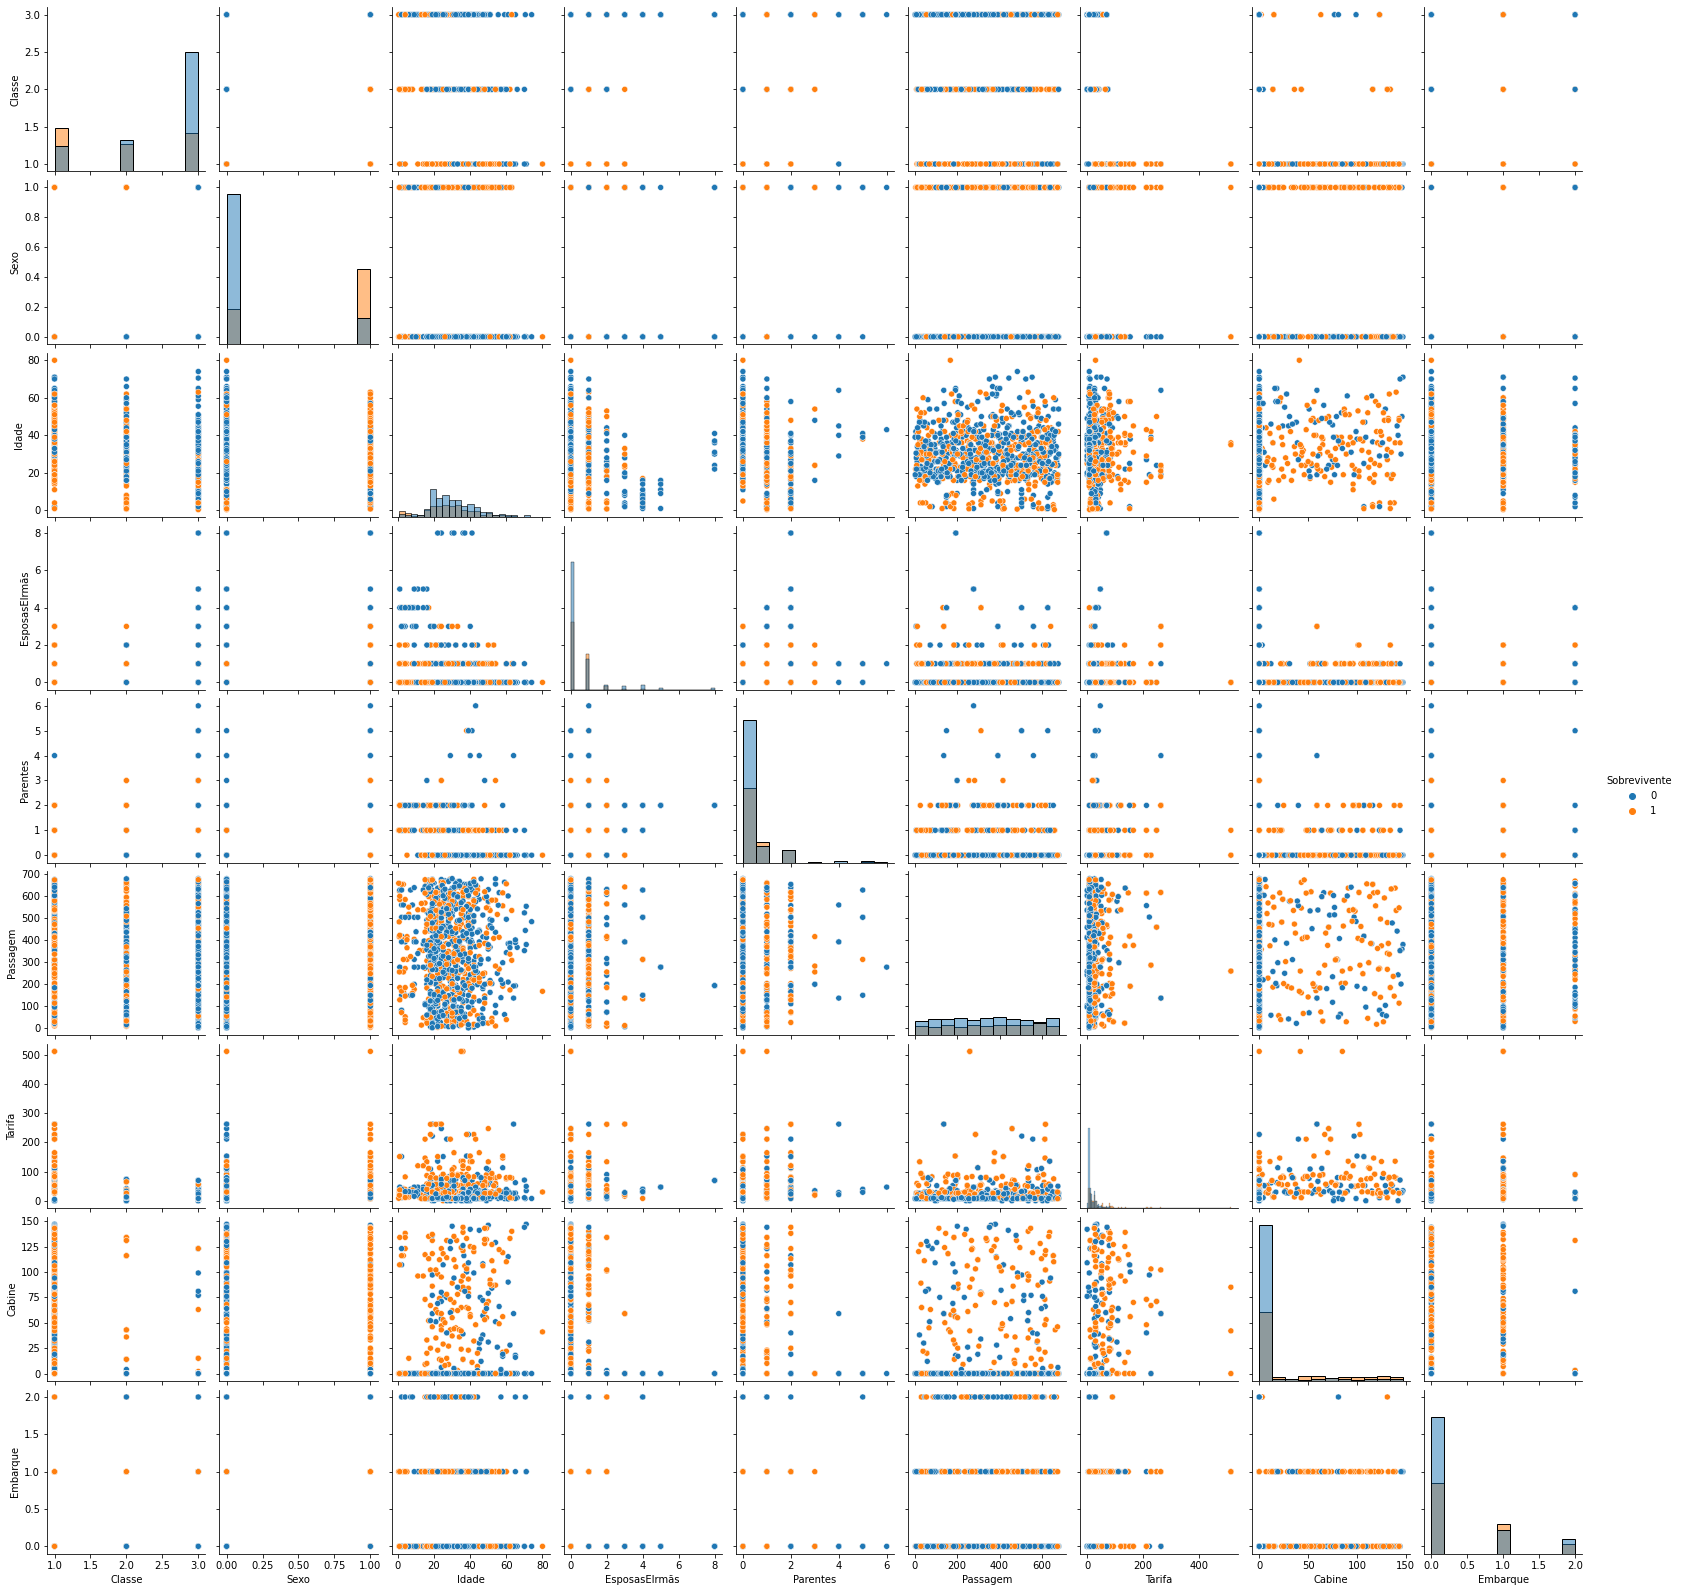

In [6]:
# Exemplo 3 – Seleção dos Dados e exibição do gráfico por
# pares
import seaborn as sb
# Elimina as colunas que não são utilizadas nas tarefas
# de aprendizado e, também, o atributo alvo, iniciando o
# processo por agrupamento
conj_completo = titanic_df.copy()
conj_modelo = titanic_df.drop(labels=['ID', 'Nome'],axis=1)
import numpy as np
idade_media = conj_modelo['Idade'].mean()
idade_std = conj_modelo['Idade'].std()
idade_null = len(conj_modelo[conj_modelo['Idade'].isnull()])
random_idades = np.random.randint(idade_media - idade_std,idade_media + idade_std, idade_null)
conj_modelo.loc[conj_modelo['Idade'].isnull(), 'Idade']= random_idades
conj_modelo.fillna(0, inplace=True)
# Exibe o gráfico dos atributos restantes combinados aos
# pares
sb.pairplot(conj_modelo, hue='Sobrevivente',diag_kind='hist')

In [18]:
# Exemplo 4 – GridSearchCV – buscando melhores parâmetros
# para o classificador SVM
import time
from sklearn import svm
from sklearn.model_selection import GridSearchCV
kernels = [ 'linear', 'poly', 'rbf' ]
Cs = [1, 10, 100, 1000, 10000]
gammas = [1e-1, 1e-2, 1e-3, 1e-4]
params_list = [
 { 'kernel': kernels, 'C': Cs, 'gamma':gammas}
 ]
tiI = time.time()
modelos = []
for k, x in {'X': X, 'Xt': Xt, 'Xs': Xs}.items():
    model = GridSearchCV(svm.SVC(probability=True,max_iter=10000,random_state=200), 
                      params_list,n_jobs=-1, verbose=1,scoring='roc_auc_ovr', cv=5)
model.fit(x, y)
    print('Melhores parâmetros: {0}\n'.format(model.best_params_))

 medias = model.cv_results_['mean_test_score']
 ranks = model.cv_results_['rank_test_score']
 desvios = model.cv_results_['std_test_score']
 params_set = model.cv_results_['params']
 zipped = zip(ranks, medias, desvios, params_set)
 sorted_zip = sorted(zipped, key=lambda x: x[0])
 points = [ 'SVM', k, sorted_zip[0][1], sorted_zip[0][2],
model.best_params_]
 modelos.append(points)
tiF = time.time()
print('Tempo: {0:.2f}'.format(tiF-tiI))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)